# Fraud Detection - Online Payments

This project is a machine learning classification model to detect fraudulent transactions in online payments. The dataset used is highly imbalanced, with far more non-fraudulent transactions than fraudulent ones. The project explores multiple algorithms and techniques to address the imbalance and improve the detection of fraud.

## Dataset

The dataset contains information about online payment transactions, including:
- Transaction Type (e.g., cash-out, transfer)
- Amount
- Origin and Destination Balances (before and after the transaction)
- Flags for potential fraud.

The dataset is available on [Kaggle](https://www.kaggle.com/datasets).

### Key Features:
- **isFraud**: The target variable, indicating whether a transaction is fraudulent (`1`) or not (`0`).
- **type**: Type of transaction (cash-in, cash-out, debit, payment, transfer).
- **Numerical Features**: Amount, old balance, and new balance of both origin and destination accounts.
- **Flag**: A binary flag for whether the transaction is considered suspicious.

## Exploratory Data Analysis (EDA)

- Analysis showed that fraud occurs only in **cash-out** or **transfer** transactions.
- A correlation matrix was generated to examine relationships between numerical features.
- Fraud cases make up a small fraction of the dataset, indicating a significant class imbalance.

## Data Preprocessing

### Steps:
1. **Handling Missing Values**: The dataset contains no missing values or duplicates.
2. **Feature Scaling**: Numerical features are scaled using `StandardScaler`.
3. **Encoding Categorical Data**: Transaction types are one-hot encoded.
4. **Data Splitting**: The dataset is split into training (75%) and testing (25%) sets.

## Imbalanced Data Handling

Given the imbalance in fraud and non-fraud transactions, the following steps were taken:
- **Random Undersampling**: To balance the data, we undersampled the majority class (non-fraudulent transactions).
  
## Model Training and Evaluation

We experimented with several machine learning algorithms, including:

1. **Logistic Regression**
2. **Decision Trees**
3. **Random Forest**
4. **Gradient Boosting**
5. **XGBoost**
6. **Support Vector Machine (SVM)**
7. **K-Nearest Neighbors (KNN)**
8. **Naive Bayes**

Each model was trained using the preprocessed data, and the results were evaluated using:
- **Accuracy Score**
- **Confusion Matrix**
- **Classification Report (Precision, Recall, F1-Score)**

### Best Performing Model

- **XGBoost** produced the best result with an accuracy score of `0.97`. It was able to balance precision and recall effectively.

## Results and Inferences

- The major challenge was the significant class imbalance, which made it easy to predict "no fraud" and achieve high accuracy.
- Undersampling helped address the imbalance and improved fraud detection.
- **XGBoost** emerged as the best model for this problem, though further improvements could be made by experimenting with different sampling techniques or more advanced models.

## Requirements

- Python 3.x
- Libraries:
  - `numpy`
  - `pandas`
  - `matplotlib`
  - `seaborn`
  - `scikit-learn`
  - `xgboost`
  - `imbalanced-learn`


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA

In [8]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
# analysing fraud through transaction type
fraud_df=df[df['isFraud']==1].groupby('type')['isFraud'].sum().reset_index()
fraud_df

,type,isFraud
0,CASH_OUT,4116
1,TRANSFER,4097


In [17]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: xlabel='type', ylabel='count'>

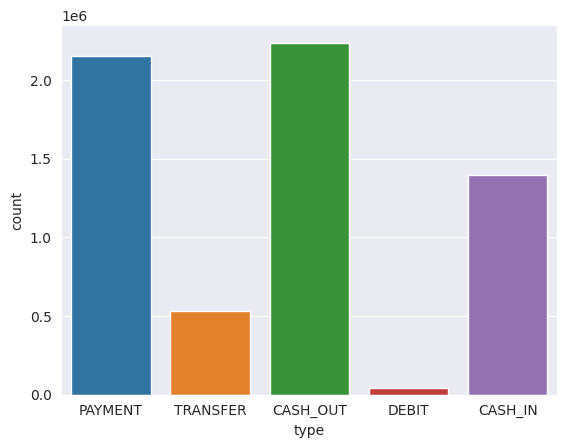

In [35]:
sns.countplot(df,x='type')

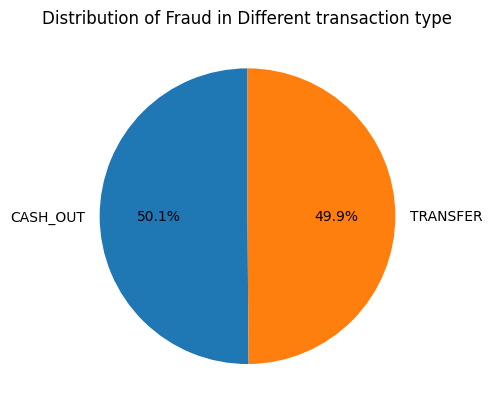

In [12]:

plt.pie(fraud_df['isFraud'],labels=fraud_df['type'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraud in Different transaction type')
plt.show()

we could see that fraud has been done either through cash-out or transfer 

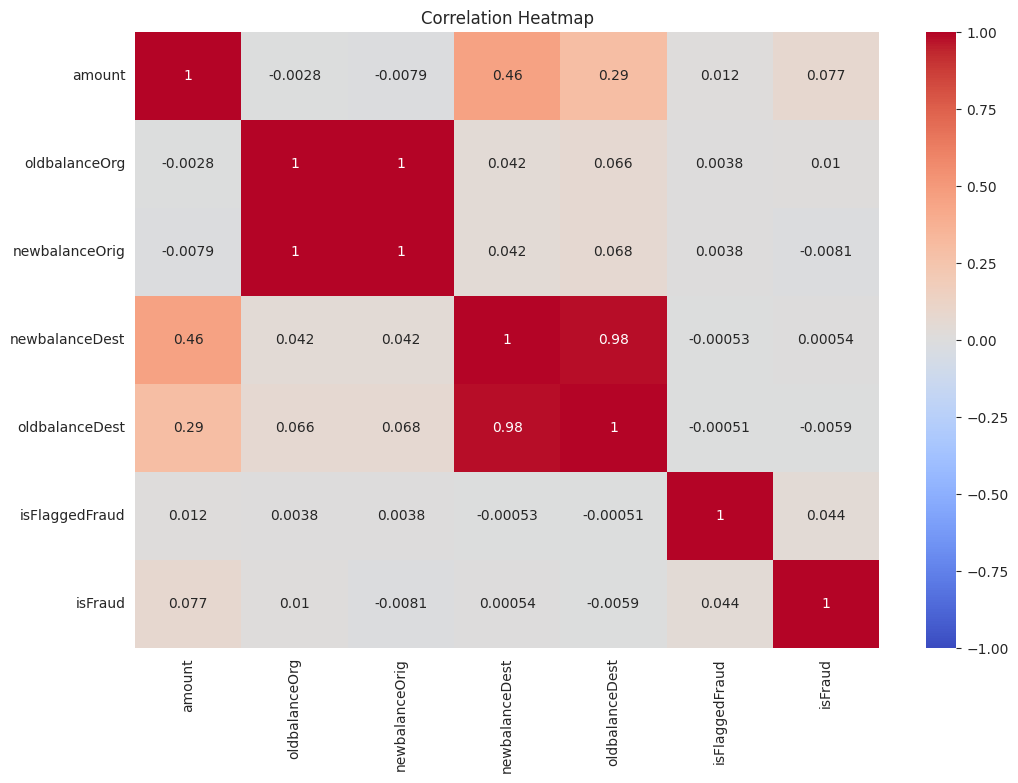

In [24]:
num_cols=['amount','oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest','isFlaggedFraud','isFraud']
corr_matrix=df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [20]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [18]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [25]:
input_cols=['type','amount','oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest','isFlaggedFraud']
tar_col=['isFraud']

In [27]:
x=df[input_cols]
y=df[tar_col]

In [38]:
num_cols=x.select_dtypes(include=np.number).columns.tolist()
cat_cols=x.select_dtypes(include='object').columns.tolist()


## Feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(x[num_cols])

In [41]:
x.loc[:, num_cols] = sc.transform(x[num_cols])

## Encoding categorical data

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder().fit(x[cat_cols])

In [44]:
encoded_list=list(encoder.get_feature_names_out(cat_cols))

In [48]:
x.loc[:,encoded_list]=encoder.transform(x[cat_cols]).toarray()

In [49]:
x=x[num_cols + encoded_list]

In [50]:
x.head()

,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,oldbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.297855,-0.288717,-0.292442,-0.333411,-0.323814,-1.001588,0.0,0.0,0.0,1.0,0.0
1,-0.297855,-0.288717,-0.292442,-0.333411,-0.323814,-1.001588,0.0,0.0,0.0,1.0,0.0
2,-0.297855,-0.288717,-0.292442,-0.333411,-0.323814,-1.001588,0.0,0.0,0.0,0.0,1.0
3,-0.297855,-0.288717,-0.292442,-0.333411,-0.323814,-1.001588,0.0,1.0,0.0,0.0,0.0
4,-0.297855,-0.288717,-0.292442,-0.333411,-0.323814,-1.001588,0.0,0.0,0.0,1.0,0.0


##  splitting data into test set and training set


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [79]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = undersample.fit_resample(x_train, y_train)
x_test_resampled,y_test_resampled=undersample.fit_resample(x_test,y_test)

In [80]:
x_train=x_resampled
y_train=y_resampled
x_test=x_test_resampled
y_test=y_test_resampled

# Training And Evaluating Model

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [81]:
def train_test_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print(f'accuracy score of {model} is :{score}')
    print(f'{classification_report(y_test,y_pred)}')
    mx=confusion_matrix(y_test,y_pred)
    sns.heatmap(mx,annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
   
    

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 
import xgboost as xg
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

sklearn.neighbors._classification.KNeighborsClassifier

In [60]:
import warnings
warnings.filterwarnings("ignore")

## Logistic Regression

accuracy score of LogisticRegression() is :0.8157894736842105
              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.73      1.00      0.84        19

    accuracy                           0.82        38
   macro avg       0.87      0.82      0.81        38
weighted avg       0.87      0.82      0.81        38



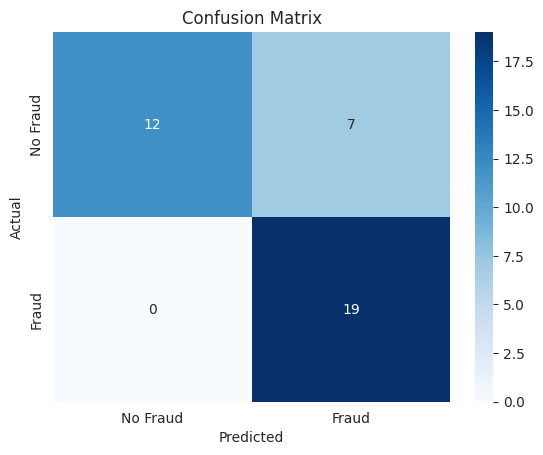

In [83]:
train_test_model(LogisticRegression())

## Decision Tree

accuracy score of DecisionTreeClassifier(max_depth=20) is :0.868421052631579
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.79      1.00      0.88        19

    accuracy                           0.87        38
   macro avg       0.90      0.87      0.87        38
weighted avg       0.90      0.87      0.87        38



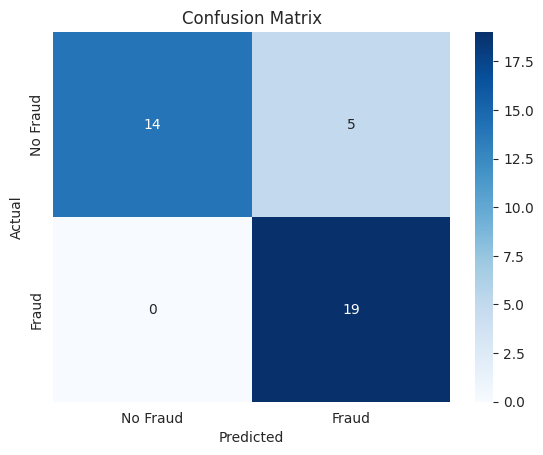

In [84]:
train_test_model(DecisionTreeClassifier(max_depth=20))

## Random Forest

In [ ]:
# we have a large datset so it will be good that we take a sample of it

In [85]:
x_train.count()

amount            1250
oldbalanceOrg     1250
newbalanceOrig    1250
newbalanceDest    1250
oldbalanceDest    1250
isFlaggedFraud    1250
type_CASH_IN      1250
type_CASH_OUT     1250
type_DEBIT        1250
type_PAYMENT      1250
type_TRANSFER     1250
dtype: int64

accuracy score of RandomForestClassifier() is :0.7894736842105263
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.87      0.68      0.76        19

    accuracy                           0.79        38
   macro avg       0.80      0.79      0.79        38
weighted avg       0.80      0.79      0.79        38



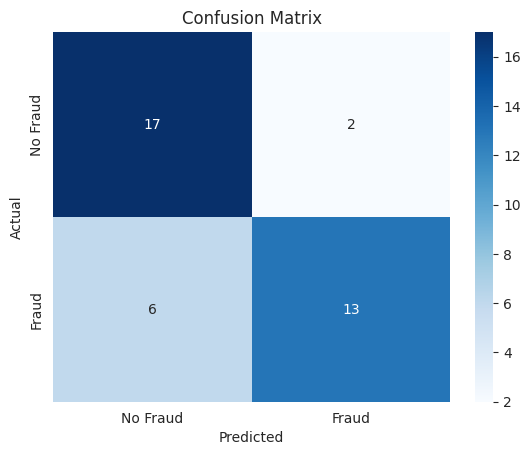

In [86]:
train_test_model(RandomForestClassifier())

## Gradient Boosting

accuracy score of GradientBoostingClassifier(max_depth=7, n_estimators=150) is :0.868421052631579
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.79      1.00      0.88        19

    accuracy                           0.87        38
   macro avg       0.90      0.87      0.87        38
weighted avg       0.90      0.87      0.87        38



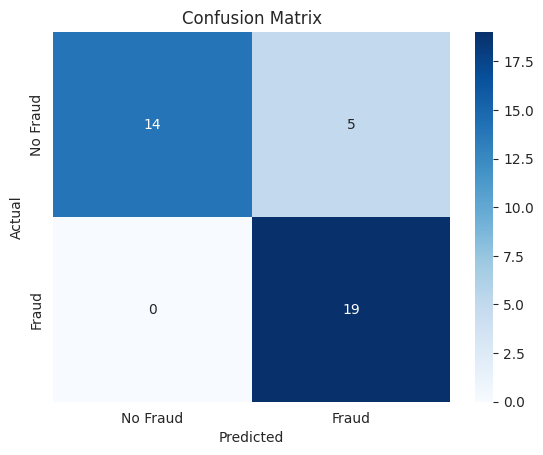

In [87]:
train_test_model(GradientBoostingClassifier(learning_rate= 0.1, max_depth=7, n_estimators= 150))

## XG boost

accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is :0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.97        19

    accuracy                           0.9

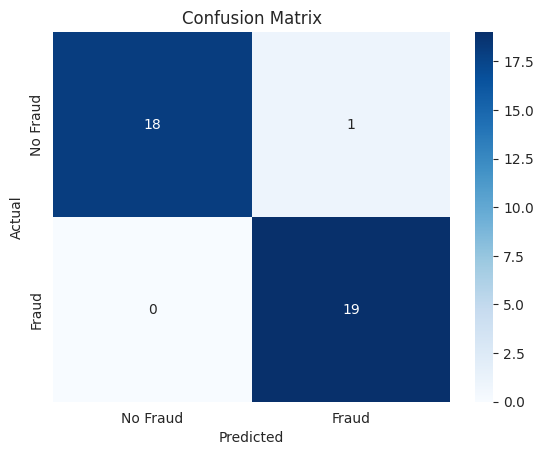

In [88]:
train_test_model(xg.XGBClassifier(learning_rate= 0.2, max_depth=7, n_estimators= 150))

## Support Vector Machine

accuracy score of SVC() is :0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        19
           1       0.00      0.00      0.00        19

    accuracy                           0.50        38
   macro avg       0.25      0.50      0.33        38
weighted avg       0.25      0.50      0.33        38



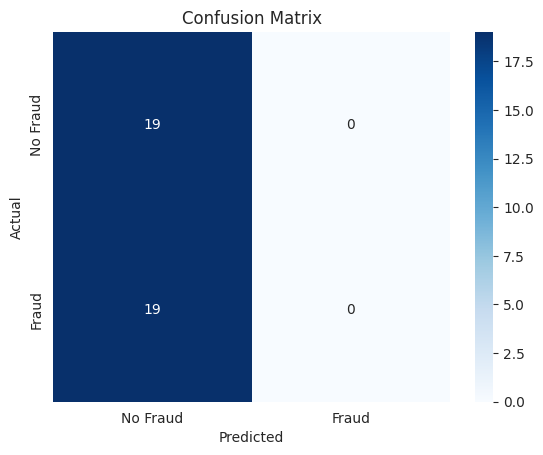

In [89]:
train_test_model(SVC())

## KNeighborsClassifier

accuracy score of KNeighborsClassifier() is :0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        19

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



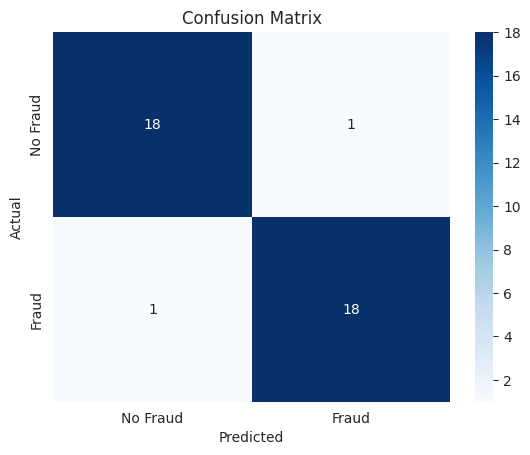

In [90]:
train_test_model(KNeighborsClassifier())

## Naive's Bayes

accuracy score of GaussianNB() is :0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        19
           1       0.00      0.00      0.00        19

    accuracy                           0.50        38
   macro avg       0.25      0.50      0.33        38
weighted avg       0.25      0.50      0.33        38



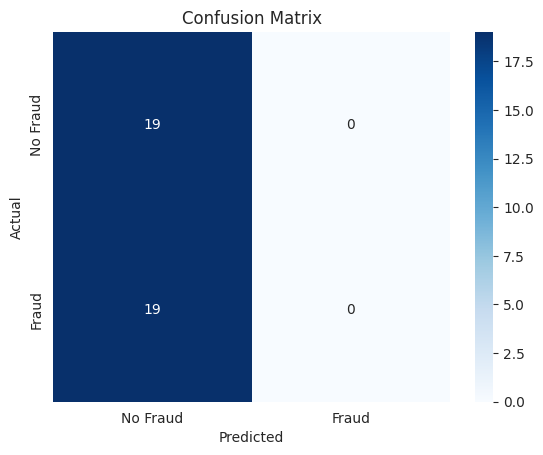

In [91]:
train_test_model(GaussianNB())

# Result and Inference

## One major takeaway was that the data was quite imbalanced where number of fraud was quite less compared to no fraud. So I used undersample 

In [93]:
df['isFraud'].value_counts()/(df['isFraud'].count())

isFraud
0    0.998709
1    0.001291
Name: count, dtype: float64

## Best Model for the undersample
---
Model **Xg boost** has produced the best result with accuracy score of `0.97`

* Improvements can be done with different sampling techniques or more advanced models.
* **Don't forget to Upvote**